# XLooper Example

> Usage demo of `qom.loopers.XLooper` module.

## Dependencies

In [1]:
# qom modules
from qom.loopers import XLooper
from qom.ui import init_log

# initialize logger
init_log()

MainProcess              INFO    2021-01-06 12:26:40.102: (qom.ui.log) ------------------------------Logger Initialized-----------------


## System Class

In [2]:
# demo class
class System00:
    """Class for the system.

    Parameters
    ----------
    params : dict
        Parameters for the system.
    """

    # template constructor
    def __init__(self, params):
        """Class constructor for System00."""

        # update code, name and params
        self.code = 'sys_00'
        self.name = 'System 00'
        self.params = params

    # demo property method
    def get_square(self):
        """Method to obtain square value.
            
        Returns
        -------
        y : float
            Square of the parameter.
        """

        return self.params['x']**2

## Parameters

In [3]:
# parameters for looper, solver, system and plotter
params = {
    'system': {
        'x': 2.0
    },
    # looper parameters
    'looper': {
        # option to show plot
        'plot': True,
        # variable in the x-axis
        'X': {
            'var': 'x',
            'min': -5,
            'max': 5,
            'dim': 101
        }
    },
    # plot parameters
    'plotter': {
        # line plot
        'type': 'line',
        # plot title
        'title': 'Square Function',
        # axis labels
        'x_name': '$x$',
        'v_label': '$x^{2}$'
    }
}

## Script

MainProcess              INFO    2021-01-06 12:26:40.193: (qom.loopers.XLooper) ---------------------Looper Initialized-----------------	
MainProcess              INFO    2021-01-06 12:26:40.194: (qom.loopers.XLooper) ---------------------Values Obtained--------------------	


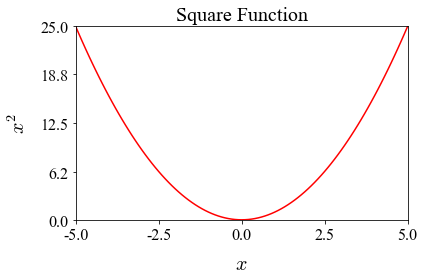

MainProcess              INFO    2021-01-06 12:26:40.533: (qom.loopers.XLooper) ---------------------Results Plotted--------------------	


In [4]:
# initialize system
system = System00(params['system'])

# template for function to loop
def func(system_params, val, logger, results):
    # update parameters
    system.params = system_params
    # get result
    res = system.get_square()
    # update results
    results.append((val, res))

# looper
looper = XLooper(func, params)
looper.loop()

## Calculating Gradients

MainProcess              INFO    2021-01-06 12:26:40.566: (qom.loopers.XLooper) ---------------------Looper Initialized-----------------	
MainProcess              INFO    2021-01-06 12:26:40.568: (qom.loopers.XLooper) ---------------------Values Obtained--------------------	


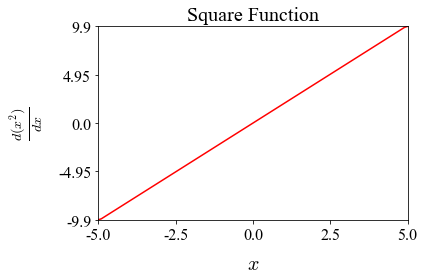

MainProcess              INFO    2021-01-06 12:26:40.785: (qom.loopers.XLooper) ---------------------Results Plotted--------------------	


In [5]:
# update plotter params
params['plotter']['v_label'] = 'Derivative of Square Function'
params['plotter']['v_label'] = '$\\frac{d(x^2)}{dx}$'

#  looper
looper = XLooper(func, params)
looper.loop(grad=True)